In [1]:
from qutip import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/neill/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['entropy', 'identity', 'info', 'squeeze', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import heom_fermions_1 as heom_fermions

In [4]:
def deltafun(j,k):
    if j==k: 
        return 1.
    else:
        return 0.

In [5]:

from scipy.integrate import quad
import scipy as scipy

In [22]:
#I need to add Ncc back in, which i do here:
from qutip.states import enr_state_dictionaries

def get_aux_matrices(full, level, N_baths, Nk, N_cut):
    """
    Extracts the auxiliary matrices at a particular level
    from the full hierarchy ADOs.
    
    Parameters
    ----------
    full: ndarray
        A 2D array of the time evolution of the ADOs.
    
    level: int
        The level of the hierarchy to get the ADOs.
        
    Nc: int
        The hierarchy cutoff.
    
    k: int
        The total number of exponentials used to express the correlation.
    """
    #Note: Max N_cut is Nk*N_baths
    nstates, state2idx, idx2state =enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)
    aux_indices = []
    
    aux_heom_indices = []
    for stateid in state2idx:
        if np.sum(stateid) == level:
            aux_indices.append(state2idx[stateid])
            aux_heom_indices.append(stateid)
    full = np.array(full)
    aux = []

    for i in aux_indices:
        qlist = [Qobj(full[k, i, :].reshape(2*Nbos, 2*Nbos).T,dims=d1.dims) for k in range(len(full))]
        aux.append(qlist)
    return aux, aux_heom_indices, idx2state

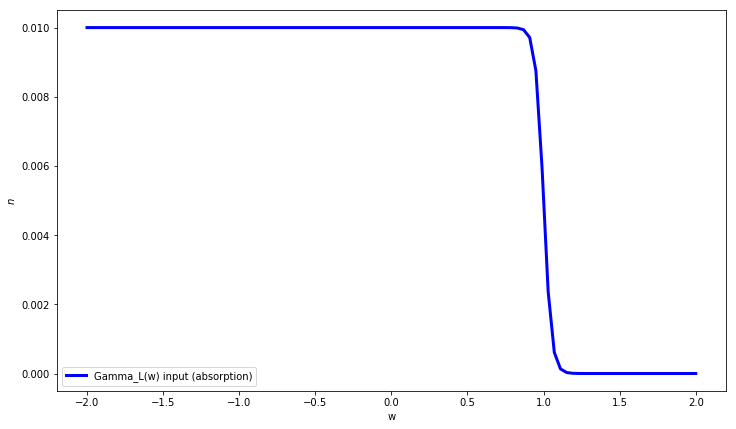

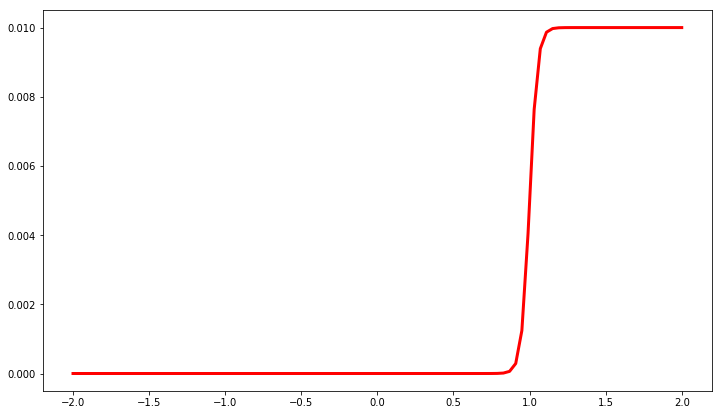

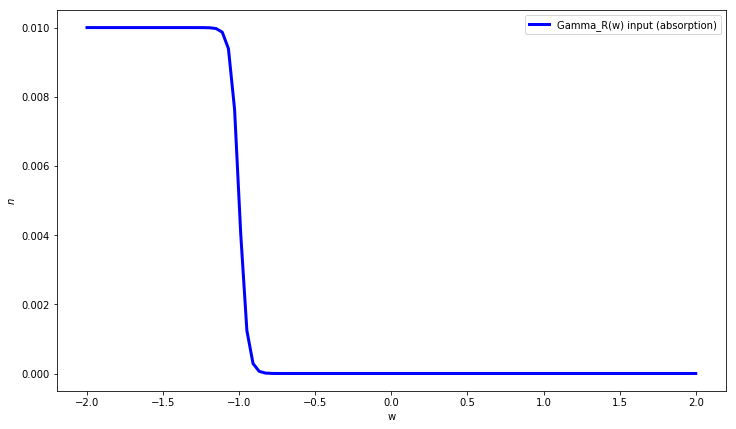

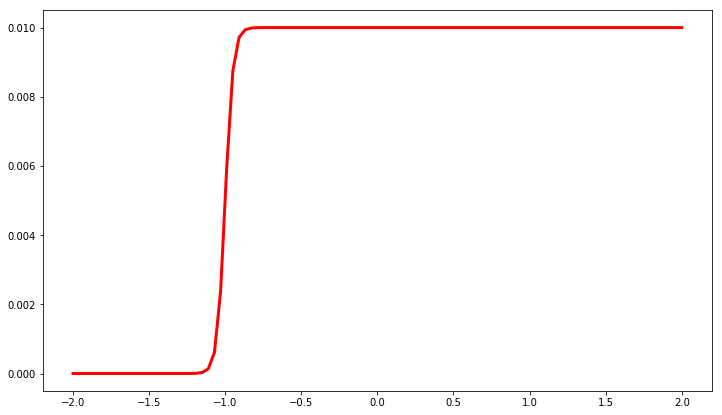

In [7]:
#parameters and spectra check

#thoss
Gamma = 0.01
#phillip
#Gamma =10

W = 10**4
#phillip
#W=0.1
#pade paper
#Gamma = 1.
#W=1.
 
#T = 300
T = 0.025851991 #in ev
beta = 1./T

theta = 2.
mu_l = theta/2.
mu_r = -theta/2.

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_R_w(w):
    return Gamma*W**2/((w-mu_r)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)
def f2(x):
    return 0.5

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")


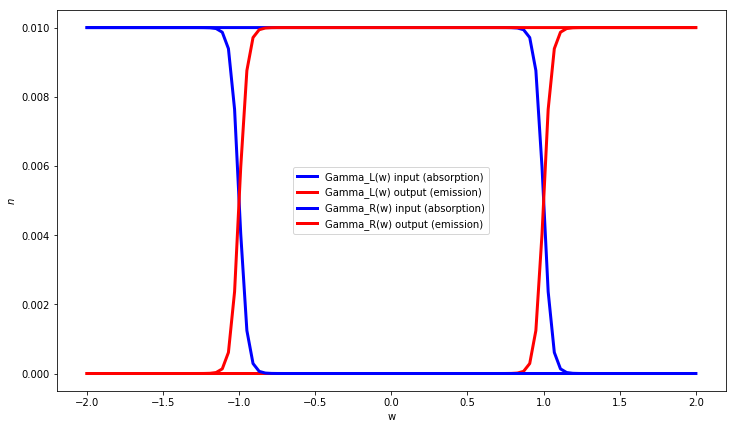

In [8]:

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")



#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

In [78]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl13n2N11 = []
fullssPlistl13n2N11 = []
theta_list = np.linspace(0,2,50)

for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 13



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 11

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    import time
    start = time.time()
    resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    end = time.time()
    print("construct time:", end - start)

    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    start = time.time()

    rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    end = time.time()
    print("ss time",end - start)
    rhoHssPlistl13n2N11.append(rhossHP)
    fullssPlistl13n2N11.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 0.9999999999999737, 0.9999999999999739, 0.9999999999999728, 0.9999999999999865, 1.0000000012338204, 1.000004717559511, 1.0016433599330683, 1.068904751759469, 1.5215569685907313, 2.6859138318921176, 5.500483547857554, 15.632670515632622, 142.0888223055412]
[0, 3.141592653589793, 9.424777960769381, 15.707963267948962, 21.99114857512857, 28.274333883086825, 34.55752325397291, 40.84270607122576, 47.256172099829456, 55.093414743766374, 67.83481329266519, 92.09955352618135, 150.55171180165394, 447.42712087095776]
[[(25+0.045370294084901217j), -0.00025851991001704547j, -0.0002585199101534635j, -0.00025851991042629926j, -0.0002585199108355568j, -0.00025851991170019957j, -0.0002585211316463929j, -0.0002589447541488439j, -0.00027633316434761475j, -0.000393352778559337j, -0.0006943622234425107j, -0.001421984592360288j, -0.004041357186951554j, -0.036732838700312104j], [(25+0.045370294084901217j), -0.00025851991001704547j, -0.0002585199101534635j, -0.0002585199104262992

KeyboardInterrupt: 

In [66]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters

rhoHssPlistl5n2N16 = []
fullssPlistl5n2N16 = []
theta_list = np.linspace(0,2,50)

for theta in theta_list:
    print("------------- theta:",theta)
    mu_l = theta/2.
    mu_r = -theta/2.


    tlist = np.linspace(0,0.001,100)



    lmax = 5



    #beta = 1./T
    #beta = np.inf

    w_list = np.linspace(-2,2,100)

    def Gamma_L_w(w):
        return Gamma*W**2/((w-mu_l)**2 + W**2)

    def Gamma_w(w, mu):
        return Gamma*W**2/((w-mu)**2 + W**2)


    def f(x):
        kB=1.
        return 1/(exp(x)+1.)





    #Next compare pade decomp to numerical integration

    Alpha =np.zeros((2*lmax,2*lmax))
    for j in range(2*lmax):
        for k in range(2*lmax):
            Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))

    eigvalsA=eigvalsh(Alpha)  

    eps = []
    for val in  eigvalsA[0:lmax]:
        #print(-2/val)
        eps.append(-2/val)


    AlphaP =np.zeros((2*lmax-1,2*lmax-1))
    for j in range(2*lmax-1):
        for k in range(2*lmax-1):
            AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
            #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))

    eigvalsAP=eigvalsh(AlphaP)    


    chi = []
    for val in  eigvalsAP[0:lmax-1]:
        #print(-2/val)
        chi.append(-2/val)


    eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
      np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
        np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
              for j in range(lmax)]


    #kappa = [0,1,1,1.56,14.44]
    kappa = [0]+eta_list
    print(kappa)
    #epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
    #print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
    epsilon = [0]+eps
    print(epsilon)
    def f_approx(x):
        f = 0.5
        for l in range(1,lmax+1):
            f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
        return f

    def f(x):
        kB=1.
        return 1/(exp(x)+1.)



    #######

    #####HERE I SET LMAX 0, and comment out hte pade stuff... lets just try with one exponent!!!!

    #now lets try switching it on. urgh.

    #lmax =2

    def C(tlist,sigma,mu):
        eta_list = []
        gamma_list  =[]

        #l = 0
        eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
        #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
        gamma_0 = W - sigma*1.0j*mu
        eta_list.append(eta_0)
        gamma_list.append(gamma_0)
        if lmax>0:
            for l in range(1,lmax+1):
                eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
                gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
        c_tot = []
        for t in tlist:
            c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
        return c_tot, eta_list, gamma_list


    #sigma = -  is dsetroy in environment create electron in system


    def c_t_L_num(t,sigma,mu):

        integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
        def real_func(x):
            return scipy.real(integrand(x))
        def imag_func(x):
            return scipy.imag(integrand(x))
        #return quad(integrand,-np.inf,np.inf)[0]
        #a= -600000
        #b = 600000

        a= -10**6
        b=10**6
        real_integral = quad(real_func, a, b)
        imag_integral = quad(imag_func, a, b)
        return real_integral[0] + 1.0j * imag_integral[0]


    #tlist = np.linspace(0,1e-3,100)


    cppL,etapL,gampL = C(tlist,1.0,mu_l)

    cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

    #mu_r = -mu_l

    cppR,etapR,gampR = C(tlist,1.0,mu_r)

    cpmR,etamR,gammR = C(tlist,-1.0,mu_r)

    #heom simu on above params (Pade)

    #try and do thos proper model

    Nbos = 16

    d1 = tensor(destroy(2), qeye(Nbos))

    a = tensor(qeye(2), destroy(Nbos))

    e1 = 0.3 #d1 = spin up
    Omega = 0.2
    Lambda = 0.12

    H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

    #Qops = [d1,d1.dag()]
    Qops = [d1.dag(),d1,d1.dag(),d1]


    rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

    Kk=lmax+1
    Ncc=2*2
    Ncc=2*4
    Ncc = 4*Kk
    Ncc = 2
    tlist = np.linspace(0,100,1000)


    eta_list = [etapR,etamR,etapL,etamL]
    #T=0:
    #eta_list = [[Gamma*W/2.],[0.]]
    #eta_list = [[0.],[Gamma*W/2.]]
    print(eta_list)
    gamma_list = [gampR,gammR,gampL,gammL]
    print(gamma_list)
    import time
    start = time.time()
    resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
    end = time.time()
    print("construct time:", end - start)

    #start = time.time()
    #out1P,full1P=resultHEOM1.run(rho_0,tlist)
    #end = time.time()
    #print(end - start)

    start = time.time()

    rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
    end = time.time()
    print("ss time",end - start)
    rhoHssPlistl5n2N16.append(rhossHP)
    fullssPlistl5n2N16.append(fullssP)
    #Pg1 = expect(out1.states,sz)
    #Pgg1 = expect(out1.states,sm*sm.dag())
    #1mev = 1.51926741 × 10^12 hertz 


    #fig, ax1 = plt.subplots(figsize=(12, 7))

    #ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.set_ylim(0, 1)
    #ax1.set_xlabel("t")
    #ax1.set_ylabel(r"pop")
    #ax1.legend()


------------- theta: 0.0
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0j), (0.0812164250062695+0j), (0.24364953787505342+0j), (0.40748373629533435+0j), (0.6431072596057126+0j), (1.823255867387885+0j)], [(10

construct time: 29.322344064712524
ss time 712.8223693370819
------------- theta: 0.2040816326530612
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.1020408163265306j), (0.0812164250062695+0.1020408163265306

construct time: 29.395997524261475
ss time 718.7481153011322
------------- theta: 0.4081632653061224
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.2040816326530612j), (0.0812164250062695+0.2040816326530612

construct time: 30.855632305145264
ss time 777.8029053211212
------------- theta: 0.6122448979591836
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.3061224489795918j), (0.0812164250062695+0.3061224489795918

construct time: 30.07257318496704
ss time 759.5949523448944
------------- theta: 0.8163265306122448
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.4081632653061224j), (0.0812164250062695+0.4081632653061224j

construct time: 29.628915786743164
ss time 749.9193863868713
------------- theta: 1.0204081632653061
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.5102040816326531j), (0.0812164250062695+0.5102040816326531

construct time: 29.04545545578003
ss time 691.1594417095184
------------- theta: 1.2244897959183672
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.6122448979591836j), (0.0812164250062695+0.6122448979591836j

construct time: 29.16373586654663
ss time 692.2970428466797
------------- theta: 1.4285714285714284
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.7142857142857142j), (0.0812164250062695+0.7142857142857142j

construct time: 29.044925689697266
ss time 686.3575854301453
------------- theta: 1.6326530612244896
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.8163265306122448j), (0.0812164250062695+0.8163265306122448

construct time: 29.414499282836914
ss time 682.1292080879211
------------- theta: 1.8367346938775508
[0, 1.0000000000000142, 1.000020205417218, 1.0483930312954886, 2.321782254903884, 22.1298045083834]
[0, 3.141592653589795, 9.424788128506366, 15.762180030750217, 24.876507948873748, 70.52670981464773]
[[(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j], [(25+0.0071092977182838826j), -0.00025851991001705593j, -0.0002585251336561144j, -0.00027103047254516404j, -0.0006002269420598094j, -0.005720995260005741j]]
[[(10000+0.9183673469387754j), (0.0812164250062695+0.9183673469387754

construct time: 29.257378578186035
ss time 677.8150463104248


In [73]:
#I need to generalize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices(fullssPlistl5n2N8, 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices(fullssPlistl5n2N8, 2, 4, K, Ncc)


d1 = tensor(destroy(2), qeye(Nbos))   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currP = [-1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]
currPl5n2N8 = [1.0j * ((d1*(sum([aux_1_list[gg][thet] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][thet] for gg in range(Kk)]))).tr()) for thet, thet2 in enumerate(theta_list)]

In [74]:
currPunitsl5n2N8 = [curr*2.434e-4*1e6 for curr in currPl5n2N8]

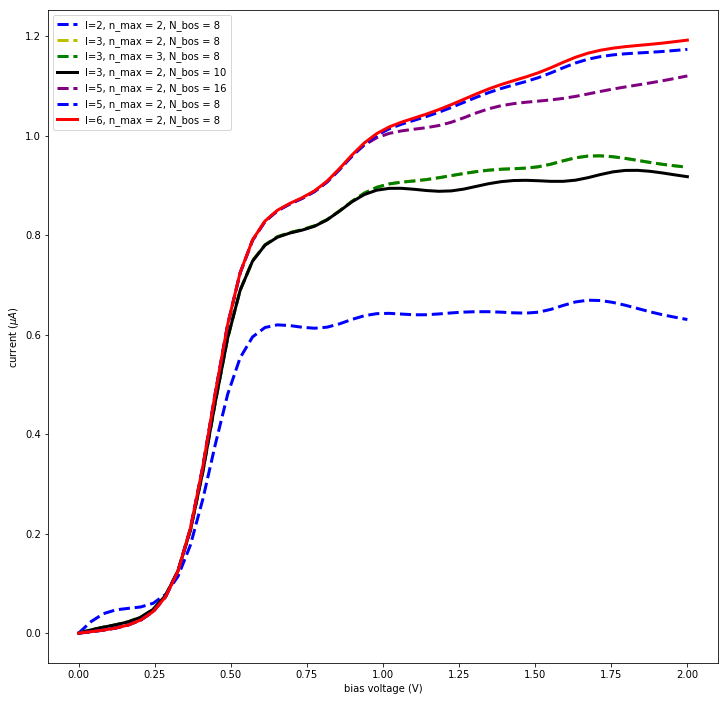

In [76]:


fig, ax1 = plt.subplots(figsize=(12, 12))


ax1.plot(theta_list,currPunitsl2, "b--", linewidth=3, label= r"l=2, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n2, "y--", linewidth=3, label= r"l=3, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n3, "g--", linewidth=3, label= r"l=3, n_max = 3, N_bos = 8")
ax1.plot(theta_list,currPunitsl3n2N10, color="black", linewidth=3, label= r"l=3, n_max = 2, N_bos = 10")
#ax1.plot(theta_list,currPunitsl5n2N8, color="red", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 10")
ax1.plot(theta_list,currPunitsl5n2N16, color="purple", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 16")
ax1.plot(theta_list,currPunitsl5n2N8, color="blue", linestyle='--', linewidth=3, label= r"l=5, n_max = 2, N_bos = 8")
ax1.plot(theta_list,currPunits, "r-", linewidth=3, label= r"l=6, n_max = 2, N_bos = 8") 
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)

ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()
plt.savefig("fig1a.pdf")

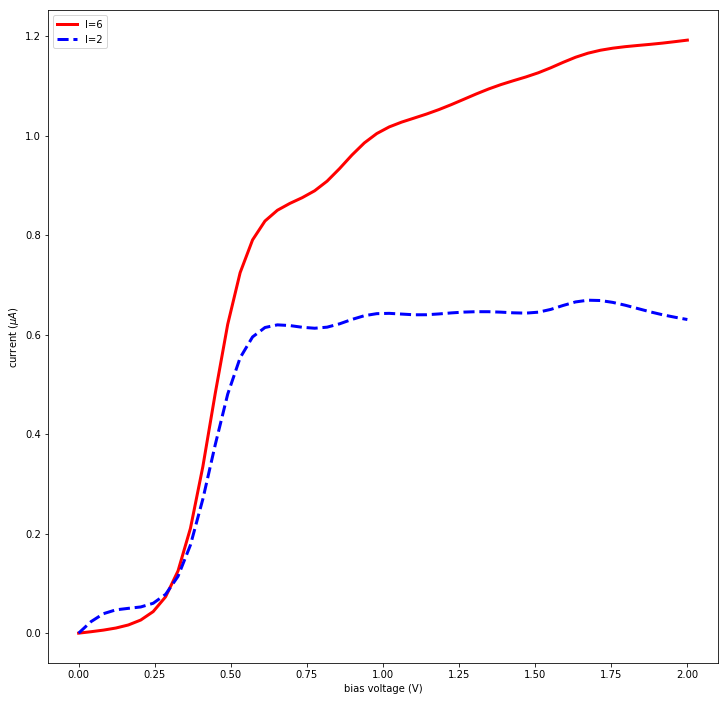

In [48]:


fig, ax1 = plt.subplots(figsize=(12, 12))

ax1.plot(theta_list,currPunits, "r-", linewidth=3, label= r"l=6")
ax1.plot(theta_list,currPunitsl2, "b--", linewidth=3, label= r"l=2")
    #ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
    #ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
ax1.set_xlabel("bias voltage (V)")
ax1.set_ylabel(r"current ($\mu A$)")
ax1.legend()

[[(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j], [(25+0.010082277039975336j), -0.0002585199100170507j, -0.0002585199239757052j, -0.000258952047262851j, -0.00031445045986558325j, -0.0008616328627340188j, -0.008130201836120126j]]
[[(10000+1j), (0.08121642500626945+1j), (0.24364927558183513+1j), (0.40611723881168166+1j), (0.5776989051727179+1j), (0.8967641605723395+1j), (2.5805253138975073+1j)], [(10000-1j), (0.08121642500626945-1j), (0.24364927558183513-1j), (0.40611723881168166-1j), (0.5776989051727179-1j),

/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


ss time 202.61168003082275


NameError: name 'out1P' is not defined

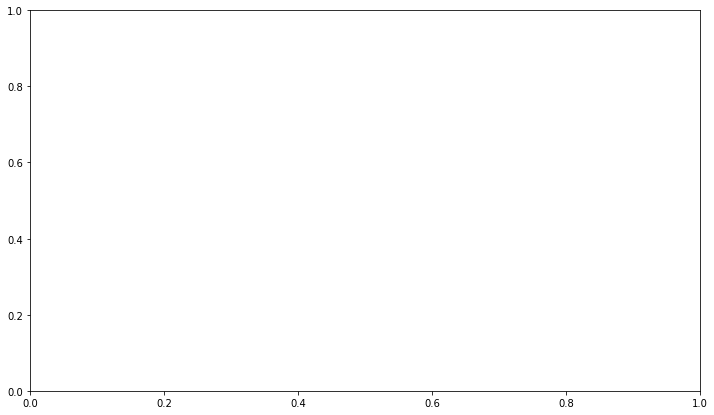

In [13]:
#heom simu on above params (Pade)

#try and do thos proper model

Nbos = 10

d1 = tensor(destroy(2), qeye(Nbos))

a = tensor(qeye(2), destroy(Nbos))

e1 = 0.3 #d1 = spin up
Omega = 0.2
Lambda = 0.12

H0 = e1*d1.dag()*d1 + Omega * a.dag()*a + Lambda * (a+a.dag())*d1.dag()*d1

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = tensor(basis(2,0)*basis(2,0).dag(),basis(Nbos,0)*basis(Nbos,0).dag())

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)
import time
start = time.time()
resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
end = time.time()
print("construct time:", end - start)

#start = time.time()
#out1P,full1P=resultHEOM1.run(rho_0,tlist)
#end = time.time()
#print(end - start)

start = time.time()

rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
end = time.time()
print("ss time",end - start)


#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 


#fig, ax1 = plt.subplots(figsize=(12, 7))

#ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
#ax1.set_xlabel("t")
#ax1.set_ylabel(r"pop")
#ax1.legend()


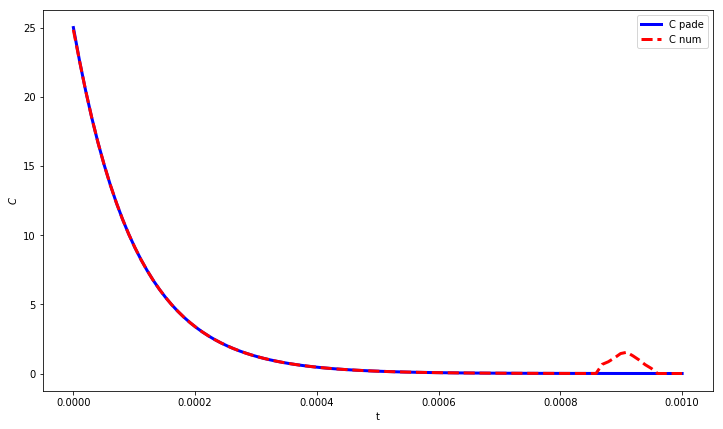

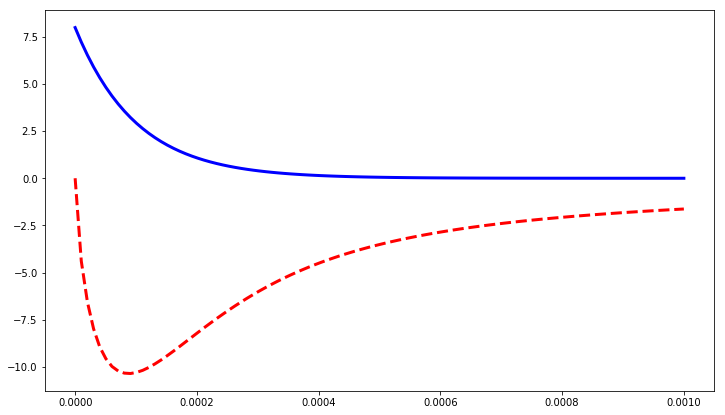

In [164]:
#asa comparison, this is matsubara
tlist = np.linspace(0,0.001,100)

#lmax = 1000000
#lmax = 1000000
lmax = 6
kappa = [0.]
kappa.extend([1. for l in range(1,lmax+1)])
epsilon = [0]
epsilon.extend([(2*l-1)*pi for l in range(1,lmax+1)])

def f_approx(x):
    f = 0.5
    for l in range(1,lmax+1):
        f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
    return f

def C(tlist,sigma,mu):
    eta_list = []
    gamma_list  =[]
    
    #l = 0
    eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
    gamma_0 = W - sigma*1.0j*mu
    eta_list.append(eta_0)
    gamma_list.append(gamma_0)
    if lmax>0:
        for l in range(1,lmax+1):
            eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
            gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
    c_tot = []
    for t in tlist:
        c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
    return c_tot, eta_list, gamma_list

def c_t_L_num(t,sigma,mu):
    
    integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000

    a= -10**6
    b=10**6
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    return real_integral[0] + 1.0j * imag_integral[0] 
 
#cp,eta,gam = C(tlist,1.0,mu_l)


cppL,etapL,gampL = C(tlist,1.0,mu_l)

cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

#mu_r = -mu_l

cppR,etapR,gampR = C(tlist,1.0,mu_r)

cpmR,etamR,gammR = C(tlist,-1.0,mu_r)


c_num =[c_t_L_num(t,1.0,mu_l) for t in tlist]


fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,real(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,real(c_num), "r--", linewidth=3, label= r"C num")


ax1.set_xlabel("t")
ax1.set_ylabel(r"$C$")
ax1.legend()
fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,imag(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,imag(c_num), "r--", linewidth=3, label= r"C num")


(0.00875448693086689+0j)


[[(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j], [(25+7.981505797494913j), -0.00025851991001705224j, -0.0002585199101534703j, -0.0002585199104263063j, -0.0002585199108355603j, -0.00025851991138123244j, -0.0002585199120633225j, -0.0002585199128818306j]]
[[(10000+1j), (0.08121642500626945+1j), (0.24364927501880834+1j), (0.4060821250313473+1j), (0.5685149750438862+1j), (0.7309478250564251+1j), (0.8933806750689639+1j), (1.05581352508150

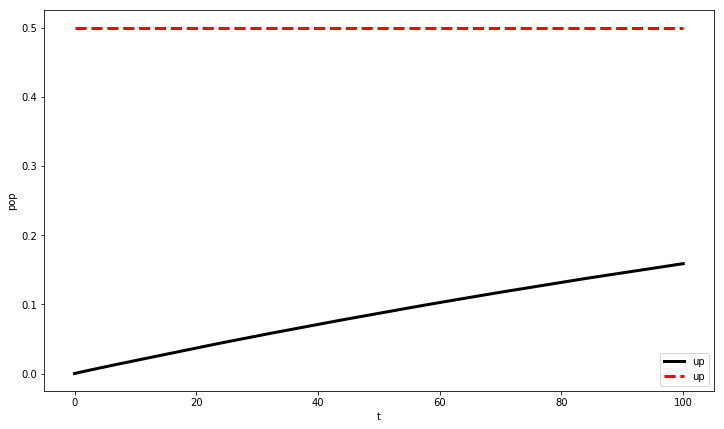

In [165]:
#heom simu on above params (Matsubara)


d1 = destroy(2)

e1 = 1. #d1 = spin up


H0 = e1*d1.dag()*d1 

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = basis(2,0)*basis(2,0).dag()

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 4*Kk 
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)
import time
start = time.time()
resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
end = time.time()
print(end - start)

start = time.time()
#out1M,full1M=resultHEOM1.run(rho_0,tlist)
end = time.time()
print(end - start)

start = time.time()

rhossHM,fullssM=resultHEOM1.ss(rho_0,H0)
end = time.time()
print(end - start)


#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 
fig, ax1 = plt.subplots(figsize=(12, 7))
#
ax1.plot(tlist,expect(out1M.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
ax1.set_xlabel("t")
ax1.set_ylabel(r"pop")
ax1.legend()


(0.002492000620502373+0j)


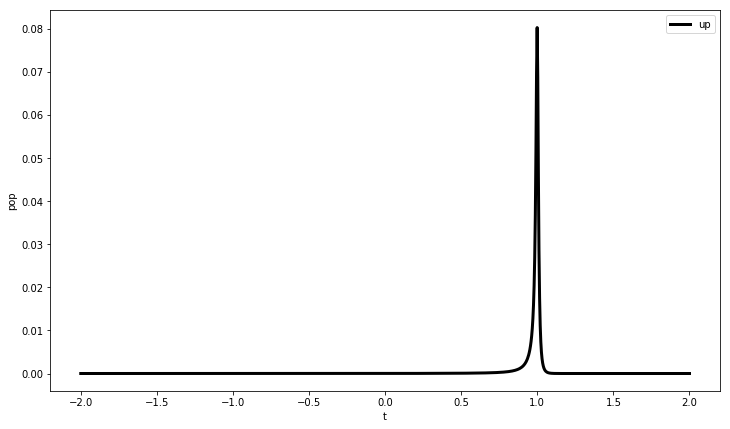

In [166]:
#note that at the moment by model is different from phillips:   w_o_r = mu_r in mine, but w_o_r = eps in phillips. fuck.

def CurrFunc():
    def lamshift(w,mu):
        return (w-mu)*Gamma_w(w,mu)/(2*W)
    integrand = lambda w: ((2/(pi))*Gamma_w(w,mu_l)*Gamma_w(w,mu_r)*(f(beta*(w-mu_l))-f(beta*(w-mu_r))) /
            ((Gamma_w(w,mu_l)+Gamma_w(w,mu_r))**2 +4*(w-e1 - lamshift(w,mu_l)-lamshift(w,mu_r))**2))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000
    
    a= -2
    b=2
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    fig, ax1 = plt.subplots(figsize=(12, 7))
#
    wlist2 = linspace(a,b,1000)
    ax1.plot(wlist2,[real_func(w) for w in wlist2], color="black", linewidth=3, label= r"up")
    
    
    #ax1.set_ylim(0, 1)
    ax1.set_xlabel("t")
    ax1.set_ylabel(r"pop")
    ax1.legend()

    return real_integral[0] + 1.0j * imag_integral[0]
    
curr_ana = CurrFunc()
print(curr_ana)

In [14]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssP], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssP], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
currP = -1.0j * ((d1*(sum([aux_1_list[gg][0] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][0] for gg in range(Kk)]))).tr())

ValueError: cannot reshape array of size 400 into shape (2,2)

In [168]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssM], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssM], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currM = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
currM = -1.0j * ((d1*(sum([aux_1_list[gg][0] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][0] for gg in range(Kk)]))).tr())

In [169]:
#lmax 7 ncc=3
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977523-0j)
(0.0008208724731238981+8.673617379884035e-19j)
(0.002492000620502373+0j)


In [152]:
#lmax 7 ncc=1? i am not sure
print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506584-3.903127820947816e-18j)
(0.0001288010061298957-4.336808689942018e-19j)
(0.002492000620502373+0j)


In [144]:
#lmax 1 I think....

print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506514-1.734723475976807e-18j)
(0.0001288010061298974+4.336808689942018e-18j)
(0.002492000620502373+0j)


In [ ]:
#note for the future... i need 3 exponents in both pade and matsubara to get analytical solution upto 0.00875 (3 sig figs?)
#P is one sig fig better (mats gives 876)

In [137]:
#7 matsubara terms result, Ncc = 4
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977966+6.418476861114186e-17j)
(0.000820872473123897+3.469446951953614e-18j)
(0.002492000620502373+0j)
